In [26]:
from sklearn import datasets
import numpy as np
X,y = datasets.make_blobs(n_features=2,centers=2)

In [55]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
clf = SVC(kernel="rbf")
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
from itertools import product
from collections import namedtuple
Point = namedtuple('Point',['x', 'y', 'outcome'])

In [57]:
#寻找X轴、y轴的最小值和最大值
xmin, xmax = np.percentile(X[:, 0], [0, 100]) #等同 X[:,0].min()
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [58]:
decision_boundary = []
for xpt, ypt in product(np.linspace(xmin-2.5, xmax+2.5, 50),np.linspace(ymin-2.5, ymax+2.5, 50)):
    #zz = svm.predict([xpt, ypt])
    p = Point(xpt, ypt, clf.predict([[xpt, ypt]]))
    decision_boundary.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


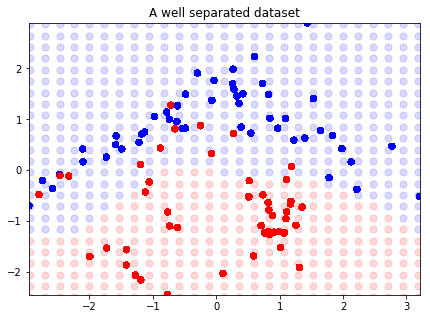

In [70]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(7,5))
colors = np.array(['r', 'b'])
for xpt, ypt, pt in decision_boundary:
    ax.scatter(xpt, ypt, color=colors[pt[0]], alpha=.15,s=50)
    #pt是一个数组，只有一个元素，就是预测的分类（0或1）
    #特别注意，这是背景色，注意alpha=.15，背景很淡
    ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=30) #y是原始值，原始分类
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    ax.set_title("A well separated dataset")
f.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


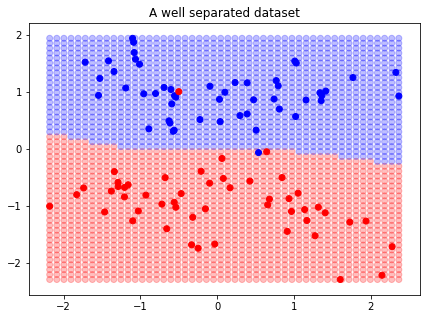

In [75]:
#另外一个边界不清晰的例子
X, y = datasets.make_classification(n_features=2,n_classes=2,n_informative=2,n_redundant=0)
clf.fit(X, y)
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])
test_preds = clf.predict(test_points)

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
import numpy as np
colors = np.array(['r', 'b'])
ax.scatter(test_points[:, 0], test_points[:, 1],color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("A well separated dataset")
f.show()